In [6]:
from keras.models import Sequential
from keras.layers import Embedding, SimpleRNN

In [7]:
model = Sequential()
model.add(Embedding(10000, 32))
model.add(SimpleRNN(32, return_sequences=True))
model.add(SimpleRNN(32, return_sequences=True))
model.add(SimpleRNN(32, return_sequences=True))
model.add(SimpleRNN(32))
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, None, 32)          320000    
                                                                 
 simple_rnn_5 (SimpleRNN)    (None, None, 32)          2080      
                                                                 
 simple_rnn_6 (SimpleRNN)    (None, None, 32)          2080      
                                                                 
 simple_rnn_7 (SimpleRNN)    (None, None, 32)          2080      
                                                                 
 simple_rnn_8 (SimpleRNN)    (None, 32)                2080      
                                                                 
Total params: 328,320
Trainable params: 328,320
Non-trainable params: 0
_________________________________________________________________


In [8]:
from keras.datasets import imdb
from keras.preprocessing import sequence
from keras.utils import pad_sequences 

max_features = 10000
maxlen = 1000
batch_size = 32

print('Loading data...')

(input_train, y_train), (input_test, y_test) = imdb.load_data(
num_words=max_features)

print(len(input_train), 'train sequences')
print(len(input_test), 'test sequences')
print('Pad sequences (samples x time)')

input_train = pad_sequences(input_train, maxlen=maxlen)
input_test = pad_sequences(input_test, maxlen=maxlen)

print('input_train shape:', input_train.shape)
print('input_test shape:', input_test.shape)

Loading data...
25000 train sequences
25000 test sequences
Pad sequences (samples x time)
input_train shape: (25000, 1000)
input_test shape: (25000, 1000)


In [9]:
from keras.layers import Dense

model = Sequential()
model.add(Embedding(max_features, 32))
model.add(SimpleRNN(32))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history = model.fit(input_train, y_train,
                    epochs=10,
                    batch_size=128,
                    validation_split=0.2)

Epoch 1/10
157/157 [==============================] - 45s 281ms/step - loss: 0.5919 - acc: 0.6714 - val_loss: 0.4414 - val_acc: 0.8020
Epoch 2/10
157/157 [==============================] - 44s 282ms/step - loss: 0.3619 - acc: 0.8520 - val_loss: 0.3794 - val_acc: 0.8378
Epoch 3/10
157/157 [==============================] - 44s 280ms/step - loss: 0.2877 - acc: 0.8850 - val_loss: 0.4207 - val_acc: 0.8044
Epoch 4/10
157/157 [==============================] - 44s 279ms/step - loss: 0.2333 - acc: 0.9097 - val_loss: 0.4412 - val_acc: 0.7978
Epoch 5/10
157/157 [==============================] - 44s 281ms/step - loss: 0.1878 - acc: 0.9313 - val_loss: 0.3498 - val_acc: 0.8702
Epoch 6/10
157/157 [==============================] - 44s 280ms/step - loss: 0.1379 - acc: 0.9531 - val_loss: 0.4962 - val_acc: 0.7948
Epoch 7/10
157/157 [==============================] - 44s 280ms/step - loss: 0.0996 - acc: 0.9665 - val_loss: 0.4684 - val_acc: 0.8236
Epoch 8/10
157/157 [==============================] - 4

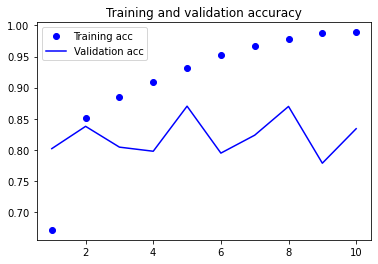

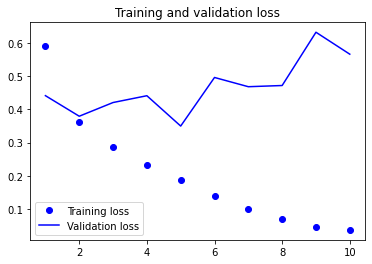

In [10]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()